In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# find end date to determine 12 months back
query = "SELECT max(date) from measurement"
engine.execute(query).fetchall()

[('2017-08-23',)]

In [11]:
db = engine.connect() # do once

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Perform a query to retrieve the data and precipitation scores
query = """
            SELECT
                date,
                prcp
            FROM
                measurement
            WHERE
                date >= '2016-08-23'
                and prcp is not null
        """

# Query All Records in the the Database
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.read_sql(query, con=db)

# Preview the Data
df.head(10)

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
5,2016-08-28,0.01
6,2016-08-29,0.00
7,2016-08-30,0.00
8,2016-08-31,0.13
9,2016-09-01,0.00


Text(0, 0.5, 'Inches')

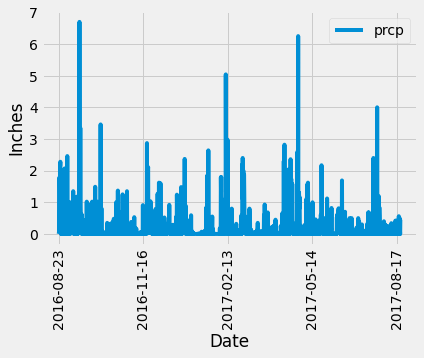

In [13]:
# Sort the dataframe by date
df = df.sort_values("date")

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x='date', y='prcp', rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [15]:
df = df.set_index('date')
df.groupby("date").describe()

prcp                                                       
           count      mean       std   min     25%    50%     75%   max
date                                                                   
2016-08-23   6.0  0.451667  0.706468  0.00  0.0275  0.100  0.5625  1.79
2016-08-24   6.0  1.555000  0.840541  0.08  1.2775  1.800  2.1500  2.28
2016-08-25   7.0  0.077143  0.071813  0.00  0.0300  0.080  0.0950  0.21
2016-08-26   6.0  0.016667  0.016330  0.00  0.0025  0.015  0.0275  0.04
2016-08-27   5.0  0.064000  0.081731  0.00  0.0000  0.020  0.1200  0.18
...          ...       ...       ...   ...     ...    ...     ...   ...
2017-08-19   3.0  0.030000  0.051962  0.00  0.0000  0.000  0.0450  0.09
2017-08-20   2.0  0.005000  0.007071  0.00  0.0025  0.005  0.0075  0.01
2017-08-21   3.0  0.193333  0.317700  0.00  0.0100  0.020  0.2900  0.56
2017-08-22   3.0  0.166667  0.288675  0.00  0.0000  0.000  0.2500  0.50
2017-08-23   4.0  0.132500  0.215000  0.00  0.0000  0.040  0.1725  0.45

[366 rows x 8 columns]

In [16]:
# Design a query to show how many stations are available in this dataset?
query = """
            SELECT
                *
            FROM
                station
        """

# Query All Records in the the Database
df_station = pd.read_sql(query, con=db)

df_station.head(20)

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [17]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
query = """
            SELECT
                s.station,
                count(*) as record_count
            FROM
                measurement m
            JOIN station s on m.station=s.station
            GROUP BY
                s.station
            ORDER BY
                record_count desc
        """

# Query All Records in the the Database
df2_station = pd.read_sql(query, con=db)

df2_station.head(10)

,station,record_count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [18]:
# joining both dataframes
query = """
            SELECT
                m.*,
                s.id as station_id,
                s.name,
                s.latitude,
                s.longitude,
                s.elevation
            FROM
                measurement m
            JOIN station s on m.station=s.station

        """

# Query All Records in the the Database
merge = pd.read_sql(query, con=db)

merge.head(10)

,id,station,date,prcp,tobs,station_id,name,latitude,longitude,elevation
0,1,USC00519397,2010-01-01,0.08,65.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00519397,2010-01-02,0.00,63.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
2,3,USC00519397,2010-01-03,0.00,74.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
3,4,USC00519397,2010-01-04,0.00,76.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
4,5,USC00519397,2010-01-06,NaN,73.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
5,6,USC00519397,2010-01-07,0.06,70.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
6,7,USC00519397,2010-01-08,0.00,64.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
7,8,USC00519397,2010-01-09,0.00,68.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
8,9,USC00519397,2010-01-10,0.00,73.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
9,10,USC00519397,2010-01-11,0.01,64.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0


In [19]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
merge.loc[merge.station == "USC00519281"].tobs.describe()

count    2772.000000
mean       71.663781
std         4.357642
min        54.000000
25%        69.000000
50%        72.000000
75%        74.000000
max        85.000000
Name: tobs, dtype: float64

In [20]:
query = """
            SELECT
                max(m.station),
                min(m.tobs),
                max(m.tobs),
                avg(m.tobs),
                count(m.tobs)
            FROM
                measurement m
            JOIN station s on m.station=s.station
            WHERE
                m.station = 'USC00519281'

        """

# Query All Records in the the Database
df_describe = pd.read_sql(query, con=db)

df_describe.head(10)

,max(m.station),min(m.tobs),max(m.tobs),avg(m.tobs),count(m.tobs)
0,USC00519281,54.0,85.0,71.663781,2772


In [21]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
query = """
            SELECT
                m.*,
                s.id as station_id,
                s.name,
                s.latitude,
                s.longitude,
                s.elevation
            FROM
                measurement m
            JOIN station s on m.station=s.station
            WHERE
                m.station = 'USC00519281'
                and date >= '2016-08-23'
        """

# Query All Records in the the Database
merge_hist = pd.read_sql(query, con=db)

merge_hist.head(10)

,id,station,date,prcp,tobs,station_id,name,latitude,longitude,elevation
0,14608,USC00519281,2016-08-23,1.79,77.0,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
1,14609,USC00519281,2016-08-24,2.15,77.0,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
2,14610,USC00519281,2016-08-25,0.06,80.0,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
3,14611,USC00519281,2016-08-26,0.01,80.0,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
4,14612,USC00519281,2016-08-27,0.12,75.0,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
5,14613,USC00519281,2016-08-28,0.60,73.0,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
6,14614,USC00519281,2016-08-29,0.35,78.0,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,14615,USC00519281,2016-08-30,0.00,77.0,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
8,14616,USC00519281,2016-08-31,0.24,78.0,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
9,14617,USC00519281,2016-09-01,0.02,80.0,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9


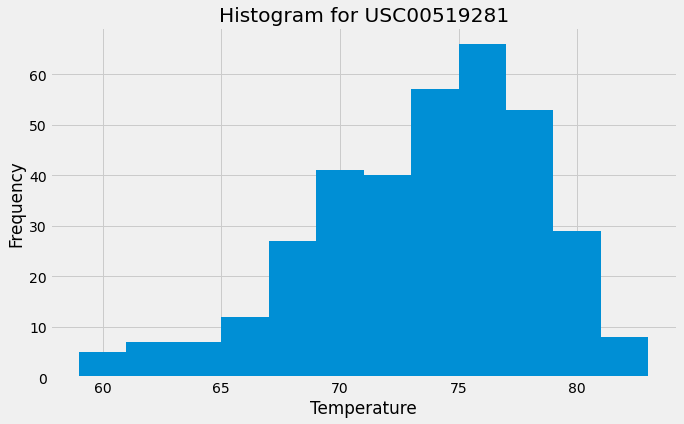

In [22]:
plt.figure(figsize=(10,6))
plt.hist(merge_hist.tobs, bins=12)
plt.title("Histogram for USC00519281")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()